In [1]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder





In [2]:
#importer les données
dataset=pd.read_excel('D:/cours IFI/Fouille_Donees/dataset/archive1/heart_excel.xlsx')
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [14]:
#INFORMATIONS SUR LES DATASETS 
dataset.info()
dataset.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 86.2+ KB


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,244.635389,0.233115,136.809368,0.887364,0.553377
std,9.432617,0.407701,18.514154,53.318029,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,1.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
#TRAITEMENT DE DONNEES
#VALEURS MANQUANTES
#compter les nombre de zéro dans cholesterol
nb_zeros=(dataset['Cholesterol']== 0).sum()
print (f"Nombre de zeros dans la colonne 'chlesterol': {nb_zeros}")





Nombre de zeros dans la colonne 'chlesterol': 172


In [5]:
#Remplacer les zéros par nAN ou null
dataset['Cholesterol']=dataset['Cholesterol'].replace(0, np.nan)
print(dataset['Cholesterol'].head())
nb_zeros=(dataset['Cholesterol']== 0).sum()
print(nb_zeros)
 #

0    289.0
1    180.0
2    283.0
3    214.0
4    195.0
Name: Cholesterol, dtype: float64
0


In [6]:
print(dataset.isnull().sum())

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64


In [7]:
#Remplacer la valeur null par la moyenne
moyenne=dataset['Cholesterol'].mean()
dataset['Cholesterol']=dataset['Cholesterol'].fillna(moyenne)
print(dataset.isnull().sum())


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [8]:
#Codification de la variable sexe
dataset['Sex']=dataset['Sex'].map({'M':1,'F': 0})
print(dataset['Sex'].head())

0    1
1    0
2    1
3    0
4    1
Name: Sex, dtype: int64


In [9]:
#OneHot Encoding
#liste des colonne à encoder
colonnes_encod=['ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
#c
#one-Hot encoding
dt_encoded=pd.get_dummies(dataset, columns=colonnes_encod, drop_first=True)
#convertire le True/Falsa à 1/0
dt_encoded=dt_encoded.replace({True:1,False:0})

dt_encoded


C:\Users\hermanhk\AppData\Local\Temp\ipykernel_17164\1926867438.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt_encoded=dt_encoded.replace({True:1,False:0})


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289.0,0,172,0.0,0,1,0,0,1,0,0,0,1
1,49,0,160,180.0,0,156,1.0,1,0,1,0,1,0,0,1,0
2,37,1,130,283.0,0,98,0.0,0,1,0,0,0,1,0,0,1
3,48,0,138,214.0,0,108,1.5,1,0,0,0,1,0,1,1,0
4,54,1,150,195.0,0,122,0.0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264.0,0,132,1.2,1,0,0,1,1,0,0,1,0
914,68,1,144,193.0,1,141,3.4,1,0,0,0,1,0,0,1,0
915,57,1,130,131.0,0,115,1.2,1,0,0,0,1,0,1,1,0
916,57,0,130,236.0,0,174,0.0,1,1,0,0,0,0,0,1,0


In [10]:
#SEPARATION DES DONNEES TRAIN ET TEST X ET Y


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Définir X et Y
x = dt_encoded.drop("HeartDisease", axis=1)  # toutes les colonnes sauf la cible
y = dt_encoded["HeartDisease"]               # la colonne cible

# Séparation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Normalisation
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

pd.DataFrame(x_train)




,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.753540,0.51740,0.403985,0.027118,1.894070,0.793140,1.055374,-0.496165,-0.532181,-0.227103,0.805877,-0.496165,1.199391,1.008208,-0.874313
1,-0.817871,0.51740,-0.950506,0.027118,-0.527964,-0.924506,0.577847,-0.496165,-0.532181,-0.227103,0.805877,-0.496165,1.199391,1.008208,-0.874313
2,1.217829,-1.93274,1.487578,2.206058,-0.527964,0.558916,-0.090691,-0.496165,1.879059,-0.227103,-1.240884,-0.496165,-0.833757,-0.991859,1.143755
3,1.324972,0.51740,0.403985,-1.968062,-0.527964,-1.666216,0.100320,-0.496165,-0.532181,-0.227103,0.805877,-0.496165,1.199391,1.008208,-0.874313
4,0.574977,0.51740,0.403985,0.027118,-0.527964,-0.768356,0.100320,-0.496165,-0.532181,-0.227103,-1.240884,2.015458,1.199391,1.008208,-0.874313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,0.039266,0.51740,-1.221404,-0.079320,-0.527964,-0.417019,1.819417,-0.496165,-0.532181,-0.227103,0.805877,-0.496165,1.199391,1.008208,-0.874313
730,-0.603587,0.51740,-0.137811,0.034005,-0.527964,0.910252,-0.854734,2.015458,-0.532181,-0.227103,0.805877,-0.496165,-0.833757,-0.991859,1.143755
731,0.360692,-1.93274,-0.246171,1.129475,-0.527964,0.871215,-0.854734,-0.496165,-0.532181,-0.227103,-1.240884,-0.496165,-0.833757,-0.991859,1.143755
732,1.110687,0.51740,0.078907,0.562853,-0.527964,-1.353917,2.965482,-0.496165,-0.532181,-0.227103,0.805877,-0.496165,1.199391,-0.991859,-0.874313


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

c:\Users\hermanhk\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5411 - loss: 0.6921 - val_accuracy: 0.7989 - val_loss: 0.6796
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8261 - loss: 0.6591 - val_accuracy: 0.8207 - val_loss: 0.5620
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8552 - loss: 0.5132 - val_accuracy: 0.8261 - val_loss: 0.4288
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8581 - loss: 0.3864 - val_accuracy: 0.8370 - val_loss: 0.3983
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8812 - loss: 0.3207 - val_accuracy: 0.8370 - val_loss: 0.3953
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8849 - loss: 0.3120 - val_accuracy: 0.8370 - val_loss: 0.3929
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8677 - loss: 0.3384 - val_accuracy: 0.8370 - val_loss: 0.3904
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8877 - loss: 0.2847 - val_accuracy: 0.8370 -

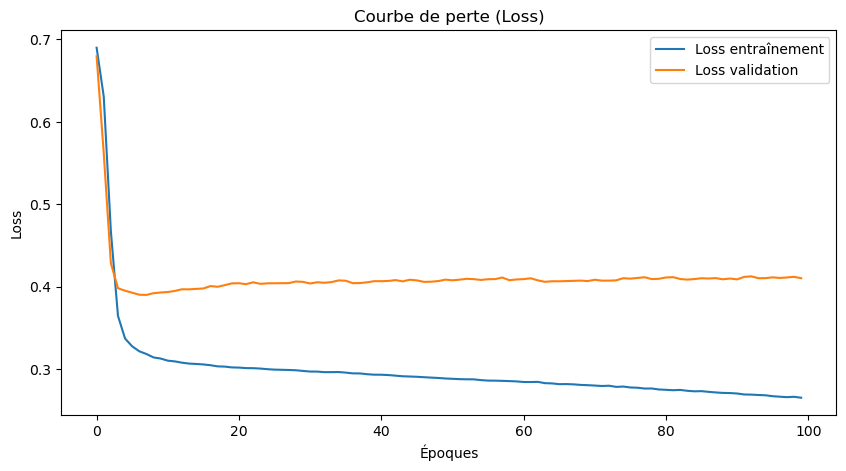

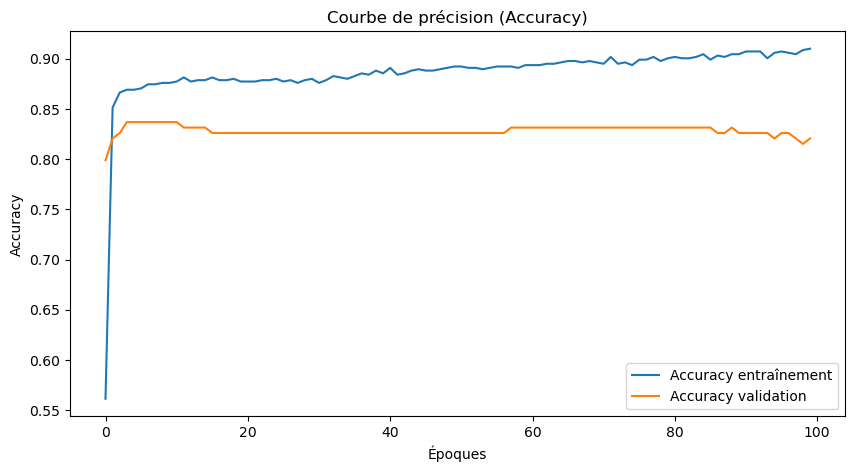

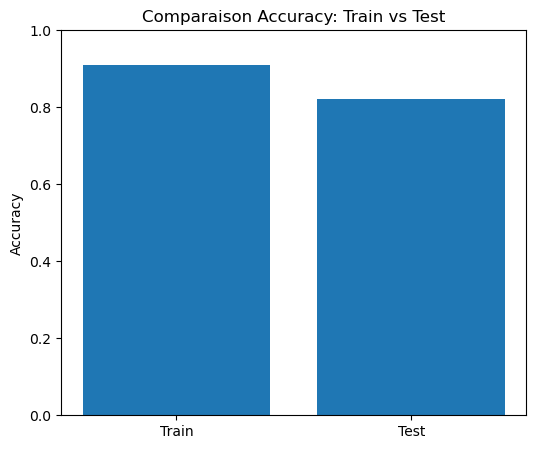

Accuracy entraînement : 0.9101
Accuracy test         : 0.8207
Perte entraînement    : 0.2627
Perte test            : 0.4104

Aperçu des 10 premières prédictions binaires sur les données de test :
[1 1 1 1 0 0 0 0 0 0]

✅ Modèle sauvegardé avec succès dans : D:/RATRAPAGE/heart_model.h5


In [ ]:
# Construction, entraînement et visualisation d'un Réseau de Neurones Artificiel (RNA)
# -----------------------------------------------------------------------------
# Hypothèses :
# - Les variables x_train, x_test, y_train, y_test sont déjà définies et prêtes (numériques, après encodage et scaling si nécessaire).
# - Problème de classification binaire (sortie 0/1).
# - TensorFlow/Keras est installé et importable.
# -----------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# -----------------------------------------------------------------------------
# 1. Construction du modèle
# -----------------------------------------------------------------------------
classifier = Sequential()

# Couche d'entrée + 1ère couche cachée
# Utilisation dynamique du nombre de variables d'entrée via x_train.shape[1]
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=x_train.shape[1]))

# 2ème couche cachée
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Couche de sortie (binaire)
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compilation
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------------------------------------------------------------
# 2. Entraînement AVEC suivi de validation (nécessaire pour tracer val_loss / val_accuracy)
# -----------------------------------------------------------------------------
history = classifier.fit(
    x_train, y_train,
    batch_size=10,
    epochs=100,
    validation_data=(x_test, y_test),  # important pour obtenir 'val_loss' & 'val_accuracy'
    verbose=1
)

# -----------------------------------------------------------------------------
# 3. Fonctions de visualisation
# -----------------------------------------------------------------------------

def plot_loss(history):
    plt.figure(figsize=(10,5))
    plt.plot(history.history['loss'], label='Loss entraînement')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Loss validation')
    plt.title('Courbe de perte (Loss)')
    plt.xlabel('Époques')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def plot_accuracy(history):
    plt.figure(figsize=(10,5))
    # Compatibilité : certaines versions enregistrent 'accuracy', d'autres 'acc'
    acc_key = 'accuracy' if 'accuracy' in history.history else 'acc'
    plt.plot(history.history[acc_key], label='Accuracy entraînement')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Accuracy validation')
    elif 'val_acc' in history.history:
        plt.plot(history.history['val_acc'], label='Accuracy validation')
    plt.title('Courbe de précision (Accuracy)')
    plt.xlabel('Époques')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


def plot_train_vs_test_score(model, x_train, y_train, x_test, y_test):
    """Compare les performances finales sur train vs test."""
    train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
    test_loss,  test_acc  = model.evaluate(x_test,  y_test,  verbose=0)

    plt.figure(figsize=(6,5))
    plt.bar(['Train', 'Test'], [train_acc, test_acc])
    plt.title('Comparaison Accuracy: Train vs Test')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.show()

    print(f"Accuracy entraînement : {train_acc:.4f}")
    print(f"Accuracy test         : {test_acc:.4f}")
    print(f"Perte entraînement    : {train_loss:.4f}")
    print(f"Perte test            : {test_loss:.4f}")


# -----------------------------------------------------------------------------
# 4. Prédictions + Matrice de confusion + Rapport de classification (optionnel)
# -----------------------------------------------------------------------------
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_prob = classifier.predict(x_test)
y_pred = (y_prob > 0.5).astype(int)

# Matrice de confusion / Rapport
cm = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :\n", cm)
print("\nRapport de classification :\n", classification_report(y_test, y_pred))
print("Accuracy test (sklearn) :", accuracy_score(y_test, y_pred))

# -----------------------------------------------------------------------------
# 5. Appels aux fonctions de tracé
# -----------------------------------------------------------------------------
plot_loss(history)
plot_accuracy(history)
plot_train_vs_test_score(classifier, x_train, y_train, x_test, y_test)




# -----------------------------------------------------------------------------
# 6. (Option) Afficher quelques prédictions binaires
# -----------------------------------------------------------------------------
print("\nAperçu des 10 premières prédictions binaires sur les données de test :")
print(y_pred[:10].ravel())

# -----------------------------------------------------------------------------
# 7. Sauvegarde du modèle entraîné
# -----------------------------------------------------------------------------
from tensorflow.keras.models import save_model
import os

# Définir le chemin complet de sauvegarde
save_path = 'D:/RATRAPAGE/heart_model.h5'

# Sauvegarder le modèle
classifier.save(save_path)

print(f"\n✅ Modèle sauvegardé avec succès dans : {save_path}")



In [12]:
# Construction d’un Réseau de Neurones Artificiel (RNA)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialisation du modèle
classifier = Sequential()

# Couche d'entrée + 1ère couche cachée (11 variables indépendantes → input_dim=11)
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=x_train.shape[1]))

# 2ème couche cachée
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Couche de sortie (sortie binaire → sigmoid)
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compilation du modèle
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
classifier.fit(x_train, y_train, batch_size=10, epochs=100)

# Prédiction sur les données de test
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)  # Convertir les probabilités en classes (0 ou 1)

# Affichage des prédictions
print("Prédictions binaires sur les données de test :")
print(y_pred.astype(int))




Epoch 1/100


c:\Users\hermanhk\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5590 - loss: 0.6928
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8312 - loss: 0.6778
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8486 - loss: 0.6009
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8651 - loss: 0.4922
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8731 - loss: 0.3995
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8770 - loss: 0.3341
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8945 - loss: 0.2887
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8942 - loss: 0.3036
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8830 - loss: 0.2998
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8996 - loss: 0.2817
Epoch 11/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8839 - loss: 0.2790
Epoch 12/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8816 - lo

In [13]:
#matrice de confusion 
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)


[[58 19]
 [11 96]]


0.8369565217391305

In [ ]:
#Teste
def predire_patient(
    Age, Sex, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak,
    ChestPainType_ATA, ChestPainType_NAP, ChestPainType_TA,
    RestingECG_Normal, RestingECG_ST,
    ExerciseAngina_Y,
    ST_Slope_Flat, ST_Slope_Up
):
    # Créer la nouvelle observation
    x_new = [[
        Age, Sex, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak,
        ChestPainType_ATA, ChestPainType_NAP, ChestPainType_TA,
        RestingECG_Normal, RestingECG_ST,
        ExerciseAngina_Y,
        ST_Slope_Flat, ST_Slope_Up
    ]]
    
    # Appliquer le scaler
    x_new_scaled = sc_X.transform(x_new)
    
    # Prédire
    y_pred = classifer.predict(x_new_scaled)[0]
    y_proba = classifer.predict_proba(x_new_scaled)[0]
    
    return y_pred, y_proba


# ----------------------------
# 🔹 Saisie des valeurs par l'utilisateur
# ----------------------------
print("Veuillez entrer les valeurs suivantes :")

Age = float(input("Âge : "))
Sex = int(input("Sexe (1=Homme, 0=Femme) : "))
RestingBP = float(input("Pression artérielle au repos : "))
Cholesterol = float(input("Cholestérol : "))
FastingBS = int(input("FastingBS (1 ou 0) : "))
MaxHR = float(input("MaxHR (fréquence cardiaque max) : "))
Oldpeak = float(input("Oldpeak : "))

# Variables one-hot (0 ou 1)
ChestPainType_ATA = int(input("ChestPainType_ATA (0 ou 1) : "))
ChestPainType_NAP = int(input("ChestPainType_NAP (0 ou 1) : "))
ChestPainType_TA = int(input("ChestPainType_TA (0 ou 1) : "))

RestingECG_Normal = int(input("RestingECG_Normal (0 ou 1) : "))
RestingECG_ST = int(input("RestingECG_ST (0 ou 1) : "))

ExerciseAngina_Y = int(input("ExerciseAngina_Y (0 ou 1) : "))

ST_Slope_Flat = int(input("ST_Slope_Flat (0 ou 1) : "))
ST_Slope_Up = int(input("ST_Slope_Up (0 ou 1) : "))

# ----------------------------
# 🔹 Appel de la fonction
# ----------------------------
prediction, proba = predire_patient(
    Age, Sex, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak,
    ChestPainType_ATA, ChestPainType_NAP, ChestPainType_TA,
    RestingECG_Normal, RestingECG_ST,
    ExerciseAngina_Y,
    ST_Slope_Flat, ST_Slope_Up
)

print("\n✅ Résultat de la prédiction :", "Malade" if prediction == 1 else "Pas malade")
print("✅ Probabilités [Classe 0, Classe 1] :", proba)

